# Gauss-Seidel Method for Solving Linear Systems

The Gauss-Seidel method is an iterative technique for solving a square system of \(n\) linear equations with unknown \(x\):
\[ Ax = b \]

where:
- \(A\) is a known (n*n) matrix,
- \(x\) is the vector of unknowns,
- \(b\) is the known vector.

The method iteratively improves the solution vector until it converges to a sufficiently accurate solution.

## Algorithm

Given a system of linear equations \(Ax = b\), the Gauss-Seidel method updates each component of the solution vector as follows:

1. Initialize the solution vector $x^{(0)}$ (often with zeros).
2. For each iteration \(k = 1, 2, 3, ...):
   - For each \(i = 1, 2, ..., n\):
     $x_i^{(k+1)}$ = $\frac{1}{a_{ii}} (b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j=i+1}^{n} a_{ij} x_j^{(k)}$
3. Repeat until convergence (e.g., $\|x^{(k+1)} - x^{(k)}\|$ is sufficiently small).

The method converges if the matrix \(A\) is diagonally dominant or positive definite.


## Implementation
Create a code cell with the implementation of the Gauss-Seidel method:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
from numpy import linalg as LA

def gauss_seidel(A: npt.NDArray[np.float64], b: npt.NDArray[np.float64], x0: npt.NDArray[np.float64], tol=1e-10, max_iterations=1000):
    x = x0.copy()
    old_x = x0.copy()
    x_values = [x.copy()]
    for _ in range(max_iterations):
        for i in range(len(A)):
            s = b[i]
            for j in range(len(A)):
                if j != i:
                    s -= A[j, i] * x[i]
            x[i] = s / A[i, i]
        x_values.append(x.copy())
        # Stop criteria
        if LA.norm(x - old_x) < tol:
            break
        old_x = x.copy()
    return x_values



Now, implement a function for plotting the convergenes of points and iterations. you should plot iteration against values of x's for the x's that you have saved in each iteration of gauss_seidel function.

In [9]:
# Plotting the convergence
def plot(x_values: list[npt.NDArray[np.float64]]):
    values = np.array(x_values).T
    for i, x in enumerate(values):
        plt.plot(x, label = f"x_{i}") 
    plt.legend() 
    plt.show()

Now test your implemented functions for given equations.

[3.17460317 2.84466019 3.24963072]


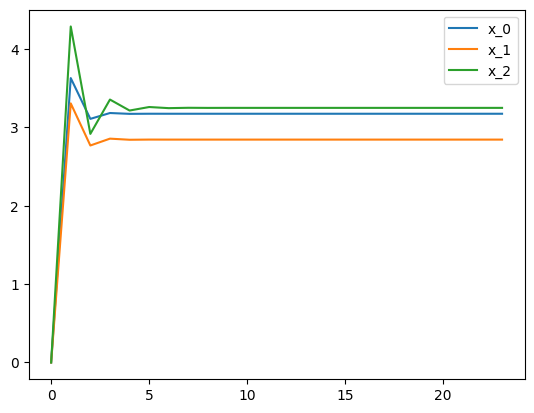

In [10]:
# Example 1:
A = np.array([[5.51, 0.86, 0.22],
              [0.76, 8.86, 1.42],
              [0.03, 0.58, 5.13]], dtype=float)
b = np.array([20, 29.3, 22], dtype=float)
x0 = np.zeros_like(b)

## [3.0954165  2.40055514 3.99898938]
result = gauss_seidel(A, b, x0)
print(result[-1])
plot(result)

C:\Users\Hirbod\AppData\Local\Temp\ipykernel_13536\2143607946.py:15: RuntimeWarning: overflow encountered in scalar multiply
  s -= A[j, i] * x[i]
e:\Apps\Python312\Lib\site-packages\matplotlib\ticker.py:2119: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


[array([0., 0.]), array([5., 5.]), array([ -5., -10.]), array([15., 35.]), array([ -25., -100.]), array([ 55., 305.]), array([-105., -910.]), array([ 215., 2735.]), array([ -425., -8200.]), array([  855., 24605.]), array([ -1705., -73810.]), array([  3415., 221435.]), array([  -6825., -664300.]), array([  13655., 1992905.]), array([  -27305., -5978710.]), array([   54615., 17936135.]), array([  -109225., -53808400.]), array([2.18455000e+05, 1.61425205e+08]), array([-4.3690500e+05, -4.8427561e+08]), array([8.73815000e+05, 1.45282684e+09]), array([-1.7476250e+06, -4.3584805e+09]), array([3.49525500e+06, 1.30754415e+10]), array([-6.99050500e+06, -3.92263245e+10]), array([1.39810150e+07, 1.17678974e+11]), array([-2.79620250e+07, -3.53036921e+11]), array([5.59240550e+07, 1.05911076e+12]), array([-1.11848105e+08, -3.17733229e+12]), array([2.23696215e+08, 9.53199686e+12]), array([-4.47392425e+08, -2.85959906e+13]), array([8.94784855e+08, 8.57879717e+13]), array([-1.78956970e+09, -2.57363915e+

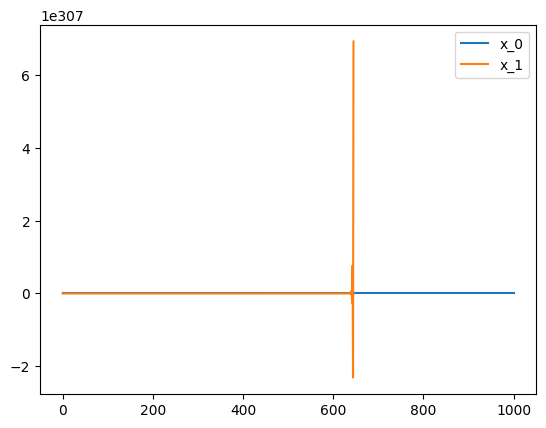

In [11]:
# Example 2:
A = np.array([[1, 3],
              [2, 1]], dtype=float)
b = np.array([5, 5], dtype=float)
x0 = np.zeros_like(b)

result = gauss_seidel(A, b, x0)
print(result)
plot(result)

## Questions :
#### Why in example 2 you cant converge to the solution ?
Your answer : A is neither positive definite nor diagonally dominant.
#### Doess gauss siedel always converge to the solution ? On what properties does convergenes of this method depends ?
Your answer : As said in the previous part, A should be either positive definite or diagonally dominant. However, The Gauss–Seidel method sometimes converges even if these conditions are not satisfied.